# Pandas Fundementals exercises

## 1. Cities in Sweden - create dataset

In [2]:
import pandas as pd

cities_Data = dict(Malmö = 347949, Stockholm = 975551, Uppsala = 233839, Göteborg = 583056)

cities_Series = pd.Series(data=cities_Data)
cities_DataFrame = pd.DataFrame(cities_Series)
cities_DataFrame

,0
Malmö,347949
Stockholm,975551
Uppsala,233839
Göteborg,583056


### Prints out Göteborgs population count

In [3]:
cities_Series["Göteborg"]

583056

### Sorts population form largest to smallest

In [4]:
sorted_Cities = cities_Series.sort_values(ascending = False)
sorted_Cities

Stockholm    975551
Göteborg     583056
Malmö        347949
Uppsala      233839
dtype: int64

### Filters out the three largest cities

In [5]:
sorted_Cities.head(3)

Stockholm    975551
Göteborg     583056
Malmö        347949
dtype: int64

### Total % of population in City

In [6]:
totalPopulation = 10379295
procent_Per_City = pd.Series(dict(Malmö = (347949/totalPopulation)*100, Stockholm = (975551/totalPopulation)*100, Uppsala = (233839/totalPopulation)*100, Göteborg = (583056/totalPopulation)*100))
df = pd.DataFrame({"Cities":cities_Series, "Procent_Per_City": procent_Per_City})
df

,Cities,Procent_Per_City
Malmö,347949,3.352338
Stockholm,975551,9.399010
Uppsala,233839,2.252937
Göteborg,583056,5.617491


## 2. Cities in Sweden - real dataset

In [7]:
import pandas as pd
import seaborn as sns
cities = pd.read_excel("Exercise_Data/komtopp50_2020.xlsx", header = 6, sheet_name="Totalt")
cities.head()

,2020,2019,Unnamed: 2,2020.1,2019.1,%
0,83,84,Ale,31868,31402,1.483982
1,64,64,Alingsås,41602,41420,0.439401
2,123,123,Alvesta,20224,20134,0.447005
3,255,255,Aneby,6821,6848,-0.394276
4,169,167,Arboga,14039,14087,-0.340740


In [8]:
cities.columns
cities2 = cities.rename({"2019": "Rang 2019", "2020": "Rang 2020", "Unnamed: 2": "Kommun", "2020.1": "Folkmängd 2020", "2019.1": "Folkmängd 2019", "Unnamed: 5": "Förändring"}, axis = "columns")
cities2

,2020,2019,Kommun,Folkmängd 2020,Folkmängd 2019,%
0,83,84,Ale,31868,31402,1.483982
1,64,64,Alingsås,41602,41420,0.439401
2,123,123,Alvesta,20224,20134,0.447005
3,255,255,Aneby,6821,6848,-0.394276
4,169,167,Arboga,14039,14087,-0.340740
...,...,...,...,...,...,...
285,54,55,Österåker,46644,45574,2.347830
286,116,115,Östhammar,22251,22250,0.004494
287,160,159,Östra Göinge,15017,15007,0.066636
288,284,284,Överkalix,3289,3315,-0.784314


In [9]:
cities_Sorted = cities2.sort_values(by="Folkmängd 2020", ascending=False)
cities_Sorted

,2020,2019,Kommun,Folkmängd 2020,Folkmängd 2019,%
198,1,1,Stockholm,975551,974073,0.151734
57,2,2,Göteborg,583056,579281,0.651670
134,3,3,Malmö,347949,344166,1.099179
241,4,4,Uppsala,233839,230767,1.331213
124,5,5,Linköping,164616,163051,0.959822
...,...,...,...,...,...,...
271,286,286,Åsele,2805,2794,0.393701
5,287,287,Arjeplog,2718,2785,-2.405745
29,288,288,Dorotea,2498,2551,-2.077617
194,289,289,Sorsele,2442,2489,-1.888309


In [10]:
cities_Sorted.tail(6)

,2020,2019,Kommun,Folkmängd 2020,Folkmängd 2019,%
136,285,285,Malå,3024,3068,-1.434159
271,286,286,Åsele,2805,2794,0.393701
5,287,287,Arjeplog,2718,2785,-2.405745
29,288,288,Dorotea,2498,2551,-2.077617
194,289,289,Sorsele,2442,2489,-1.888309
12,290,290,Bjurholm,2387,2408,-0.872093


In [11]:
totalPopulation2020 = 0
totalPopulation2019 = 0
for i in cities_Sorted["Folkmängd 2020"]:
    totalPopulation2020 += i

for i in cities_Sorted["Folkmängd 2019"]:
    totalPopulation2019 += i

print(f"Populationen i Sverige 2020: {totalPopulation2020}")
print(f"Populationen i Sverige 2019: {totalPopulation2019}")

Populationen i Sverige 2020: 10379295
Populationen i Sverige 2019: 10327589


<AxesSubplot:xlabel='Kommun', ylabel='Folkmängd 2020'>

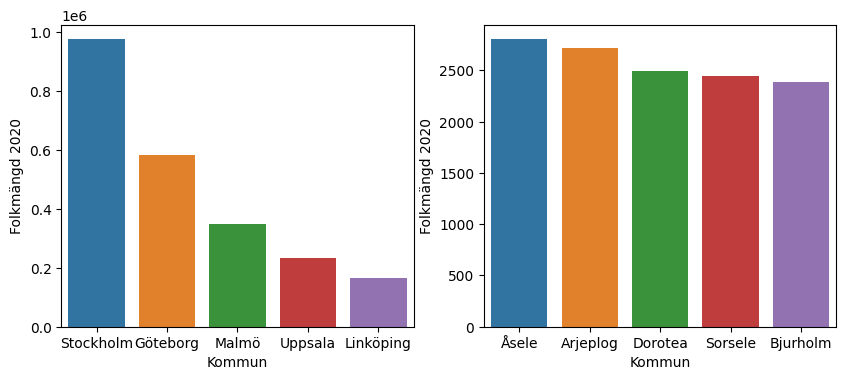

In [12]:
import matplotlib.pyplot as plt
mostPopulatedCities = cities2.sort_values(by="Folkmängd 2020", ascending=False).head()
leastPopulatedCities = cities2.sort_values(by = "Folkmängd 2020", ascending=False).tail()
leastPopulatedCities
fig, ax = plt.subplots(1,2, dpi=100, figsize=(10, 4))
sns.barplot(data=mostPopulatedCities, x="Kommun", y="Folkmängd 2020", ax=ax[0])
sns.barplot(data=leastPopulatedCities, x="Kommun", y="Folkmängd 2020", ax=ax[1])

## 3. Cities in Sweden - gender

In [45]:
male = pd.read_excel("Exercise_Data/komtopp50_2020.xlsx", header=6, sheet_name="Män")
female = pd.read_excel("Exercise_Data/komtopp50_2020.xlsx", header=6, sheet_name="Kvinnor")
male = male.rename({"2020": "Rang 2020", "2019": "Rang 2019", "Unnamed: 2": "Kommun", "2020.1": "Folkmängd 2020", "2019.1": "Folkmängd 2019", "%": "Förändring"}, axis= "columns")
female = female.rename({"2020": "Rang 2020", "2019": "Rang 2019", "Unnamed: 2": "Kommun", "2020.1": "Folkmängd 2020", "2019.1": "Folkmängd 2019", "%": "Förändring"}, axis = "columns")
male["Kön"] = "Man"
female["Kön"] = "Kvinna"
gendersData = male.append(female, ignore_index=True)
gendersData.head(294)

,2020,2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring,Kön
0,81,83,Ale,16256,16054,1.258253,Man
1,64,64,Alingsås,20702,20646,0.271239,Man
2,122,123,Alvesta,10367,10339,0.270819,Man
3,255,255,Aneby,3503,3498,0.142939,Man
4,169,168,Arboga,7094,7114,-0.281136,Man
...,...,...,...,...,...,...,...
289,279,279,Övertorneå,2190,2234,-1.969561,Man
290,84,85,Ale,15612,15348,1.720094,Kvinna
291,64,64,Alingsås,20900,20774,0.606527,Kvinna
292,123,123,Alvesta,9857,9795,0.632976,Kvinna


In [119]:
totalPop = pd.DataFrame([male["Kommun"], male["Folkmängd 2020"] + female["Folkmängd 2020"], male["Folkmängd 2019"] + female["Folkmängd 2019"]])
newTotalPop = totalPop.transpose()
newTotalPop.columns
newTotalPop = newTotalPop.rename({"Folkmängd 2020": "Total Folkmängd 2020", "Folkmängd 2019": "Total Folkmängd 2019"}, axis="columns")
newTotalPop["Total Förändring"] = newTotalPop["Total Folkmängd 2020"]/newTotalPop["Total Folkmängd 2019"]
newTotalPop

,Kommun,Total Folkmängd 2020,Total Folkmängd 2019,Total Förändring
0,Ale,31868,31402,1.01484
1,Alingsås,41602,41420,1.004394
2,Alvesta,20224,20134,1.00447
3,Aneby,6821,6848,0.996057
4,Arboga,14039,14087,0.996593
...,...,...,...,...
285,Österåker,46644,45574,1.023478
286,Östhammar,22251,22250,1.000045
287,Östra Göinge,15017,15007,1.000666
288,Överkalix,3289,3315,0.992157
